# **STEP 1: Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **STEP 2: Load Dataset**

In [3]:
df = pd.read_csv('/content/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv')
df.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


# **STEP 3: Basic Data Understanding**

In [4]:
df.shape
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   status                              61352 non-null  object
 1   accident_index                      61352 non-null  object
 2   accident_year                       61352 non-null  int64 
 3   accident_reference                  61352 non-null  object
 4   vehicle_reference                   61352 non-null  int64 
 5   casualty_reference                  61352 non-null  int64 
 6   casualty_class                      61352 non-null  int64 
 7   sex_of_casualty                     61352 non-null  int64 
 8   age_of_casualty                     61352 non-null  int64 
 9   age_band_of_casualty                61352 non-null  int64 
 10  casualty_severity                   61352 non-null  int64 
 11  pedestrian_location                 61352 non-null  in

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
count,61352,61352,61352.0,61352,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352
unique,1,48283,NaN,48283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23841
top,Unvalidated,2022010377133,NaN,010377133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
freq,61352,16,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8027
mean,NaN,NaN,2022.0,NaN,1.450368,1.333779,1.482299,1.368790,36.670312,6.288157,2.783039,0.800316,0.645325,0.222047,0.048507,0.032860,9.475160,1.091032,4.337674,NaN
std,NaN,NaN,0.0,NaN,1.109855,0.981507,0.735614,0.534536,19.574357,2.463082,0.442318,2.197167,2.009611,0.615127,0.426419,0.261327,16.662727,0.903365,3.158496,NaN
min,NaN,NaN,2022.0,NaN,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
25%,NaN,NaN,2022.0,NaN,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,NaN
50%,NaN,NaN,2022.0,NaN,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000,NaN
75%,NaN,NaN,2022.0,NaN,2.000000,1.000000,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000,NaN


# **STEP 4: Target Variable Distribution (Visualization)**

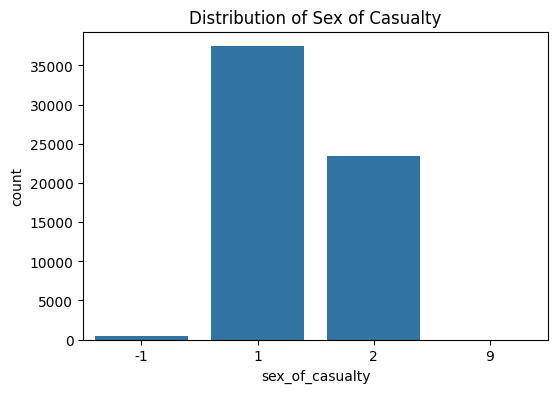

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex_of_casualty', data=df)
plt.title('Distribution of Sex of Casualty')
plt.show()

# **STEP 5: Encode Target Variable**

In [6]:
le_target = LabelEncoder()
df['sex_of_casualty'] = le_target.fit_transform(df['sex_of_casualty'])

# **STEP 6: Feature–Target Split**

In [7]:
X = df.drop('sex_of_casualty', axis=1)
y = df['sex_of_casualty']

# **STEP 7: Identify Numerical & Categorical Columns**

In [8]:
numerical_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# **STEP 8: Handle Missing Values**

In [9]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

# **STEP 9: Encode Categorical Features**

In [10]:
X = pd.get_dummies(X, drop_first=True)

# **STEP 10: Feature Distribution Visualization**

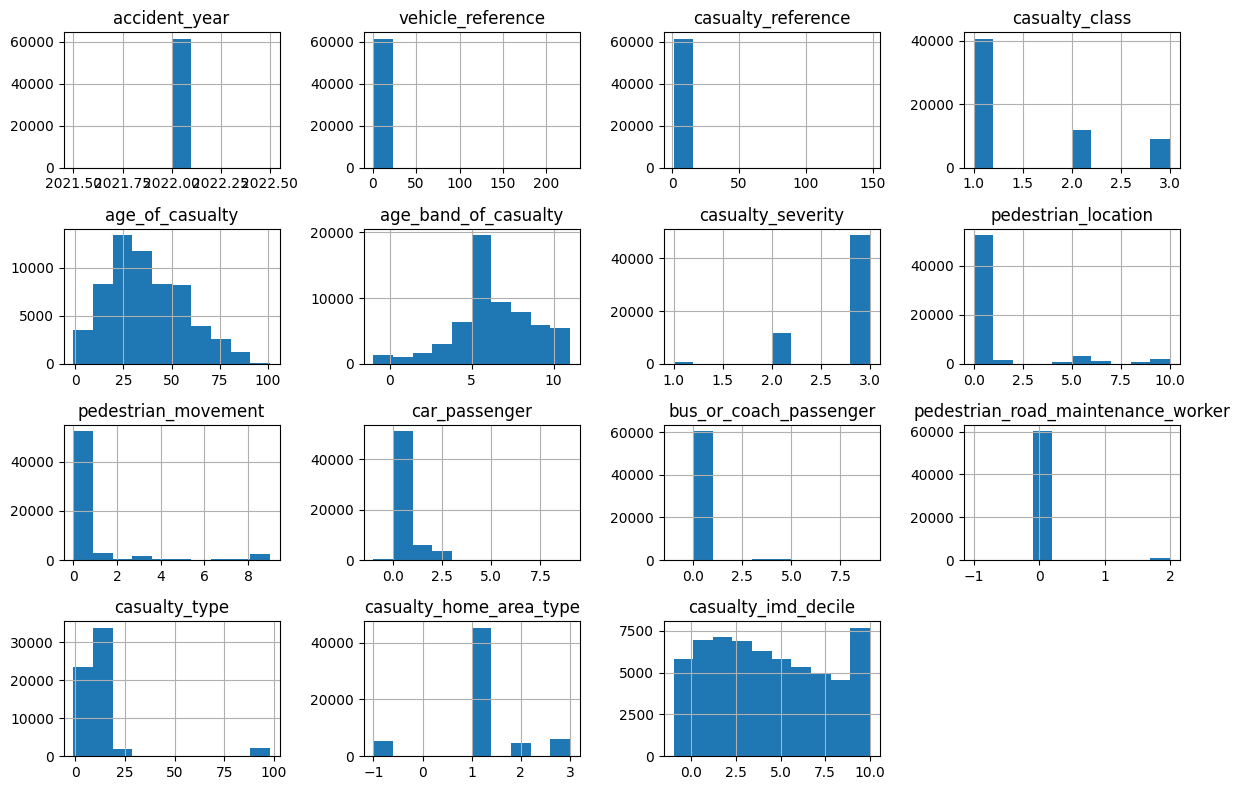

In [11]:
X[numerical_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# **STEP 11: Correlation Heatmap**

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **STEP 12: Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **STEP 13: Train–Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# **STEP 14: Build Classification Models**

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC(probability=True)
}

# **STEP 15: Train Models & Make Predictions**

In [ ]:
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

# **STEP 16: Model Evaluation (Accuracy + Report)**



In [ ]:
results = {}

for name, y_pred in predictions.items():
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# **STEP 17: Confusion Matrix Visualization**

In [ ]:
for name, y_pred in predictions.items():
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# **STEP 18: Accuracy Comparison Table**

In [ ]:
accuracy_df = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy': results.values()
})

accuracy_df

# **STEP 19: Accuracy Comparison Visualization**

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.xticks(rotation=30)
plt.title('Model Accuracy Comparison')
plt.show()

# **STEP 20: Feature Importance (Random Forest)**

In [ ]:
rf_model = models["Random Forest"]
feature_importance = pd.Series(
    rf_model.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

# **STEP 21: Select the Best Model Based on Accuracy**

In [ ]:
best_model_name = accuracy_df.sort_values(by='Accuracy', ascending=False).iloc[0]['Model']
best_model_name

# **STEP 22: Call the Best Model Object**

In [ ]:
best_model = models[best_model_name]

# **STEP 23: Final Evaluation of Best Model**

In [ ]:
best_pred = best_model.predict(X_test)

print("Final Model:", best_model_name)
print("Final Accuracy:", accuracy_score(y_test, best_pred))
print(classification_report(y_test, best_pred))

# **STEP 24: Confusion Matrix of Best Model**

In [ ]:
cm = confusion_matrix(y_test, best_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Final Confusion Matrix')
plt.show()

# **STEP 25: Use Best Model for New Prediction**

In [ ]:
sample_input = X_test[0].reshape(1, -1)
best_model.predict(sample_input)

# **STEP 26: Import ROC–AUC Utilities**

In [ ]:
from sklearn.metrics import roc_curve, auc